# Library Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import h5py as h5 #to read the correlator
import numpy as np #to do everything
from pathlib import Path #to read the file's names
from typing import Any, Callable #to use annotations for functions
import matplotlib.pyplot as plt #to plot stuff
from tqdm import tqdm #for a nice view of for loops with loading bars
import os #to access enviromental variables

In [3]:
import sys

sys.path.insert(1, '../')

from moments_toolkit import moments_toolkit

# First tests

In [4]:
p3fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/3PointCorrelation/"
p2fold = os.environ['mount_point_path'] + "48c48/binned_1012_hmz370_BMW/2PointCorrelation/"

In [5]:
#p = Path(p3fold)#.glob('**/*')
#T_list = sorted( [int(x.name[1:]) for x in p.iterdir() if x.is_dir() and x.name.startswith('T')] )
#bb_pathList = [f"{p3fold}T{T}" for T in T_list]
#
#T_list
#bb_pathList


In [6]:
#sorted( [str(f.absolute()) for f in folders] )

In [7]:
ok = moments_toolkit(p3fold,p2fold,maxConf=2,verbose=True)


Initializing the moments_toolkit class instance...



Reading data for T = 6 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:04<00:00,  2.11s/it]



Looping over the configurations to read the 2-point correlators from the h5 files...



100%|██████████| 2/2 [00:00<00:00, 108.67it/s]




Reading data for T = 7 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:04<00:00,  2.29s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 8 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:04<00:00,  2.29s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 10 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:04<00:00,  2.21s/it]



Two-point correlators retrieved from previous class instance...



Reading data for T = 12 ...


Initializing the building block class instance...


Looping over the configurations to read the building blocks from the h5 files...



100%|██████████| 2/2 [00:04<00:00,  2.36s/it]



Two-point correlators retrieved from previous class instance...


Building the list of all available operators...


Class Initialization Complete!



In [8]:
bblist = ok.bb_list

[bb.nconf for bb in bblist]

[2, 2, 2, 2, 2]

In [9]:
ok.operator_show(show=True, verbose=True)


Generating the operators catalogue ...


Operators catalogue generated


Operators catalogue shown


Operators catalogue available in operator_catalogue.pdf



In [10]:
#ok.operator_show(remove_pdf=True, verbose=True)

In [11]:
from sympy import Symbol

x = Symbol('x')
y = Symbol('y')

f = x**3 + x

f.simplify()

f.subs({x**3:y})

f

x**3 + x

x + y

x**3 + x

In [12]:
[i for i in range(2,10)]

[2, 3, 4, 5, 6, 7, 8, 9]

In [13]:
type(f)

sympy.core.add.Add

In [14]:
op2 = ok.operator_list[1]

In [15]:
op2.id

2

In [16]:
len(ok.operator_list)

224

In [17]:
type(ok)

moments_toolkit.moments_toolkit

In [18]:
type(ok.operator_list)

type(ok.operator_list[1].id)

print(ok.operator_list[1].id)

list

int

2


In [19]:
ok.operator_list[1].O

1.0*O[1, 1] + 1.0*O[2, 2] + 1.0*O[3, 3] - 3.0*O[4, 4]

In [20]:
np.shape(ok.operator_list)

(224,)

In [21]:
ok.select_operator(2,11)

In [22]:
ok.selected_op[1].K

-2*I*p_1*p_2/E(p)

In [23]:
type(ok.selected_op[1].O)
type(ok.selected_op[1].K)

sympy.core.add.Add

sympy.core.mul.Mul

In [24]:
[display(l.O) for l in ok.selected_op]

1.0*O[1, 1] + 1.0*O[2, 2] + 1.0*O[3, 3] - 3.0*O[4, 4]

1.0*O[1, 2] + 1.0*O[2, 1]

[None, None]

In [25]:
import sympy as sym
sym.pprint(ok.selected_op[1].O)

1.0⋅O[1, 2] + 1.0⋅O[2, 1]


In [28]:
ok.selected_op

[O[1, 1] + O[2, 2] + O[3, 3] - 3*O[4, 4], O[1, 2] + O[2, 1]]

In [29]:
okR = ok.get_R()

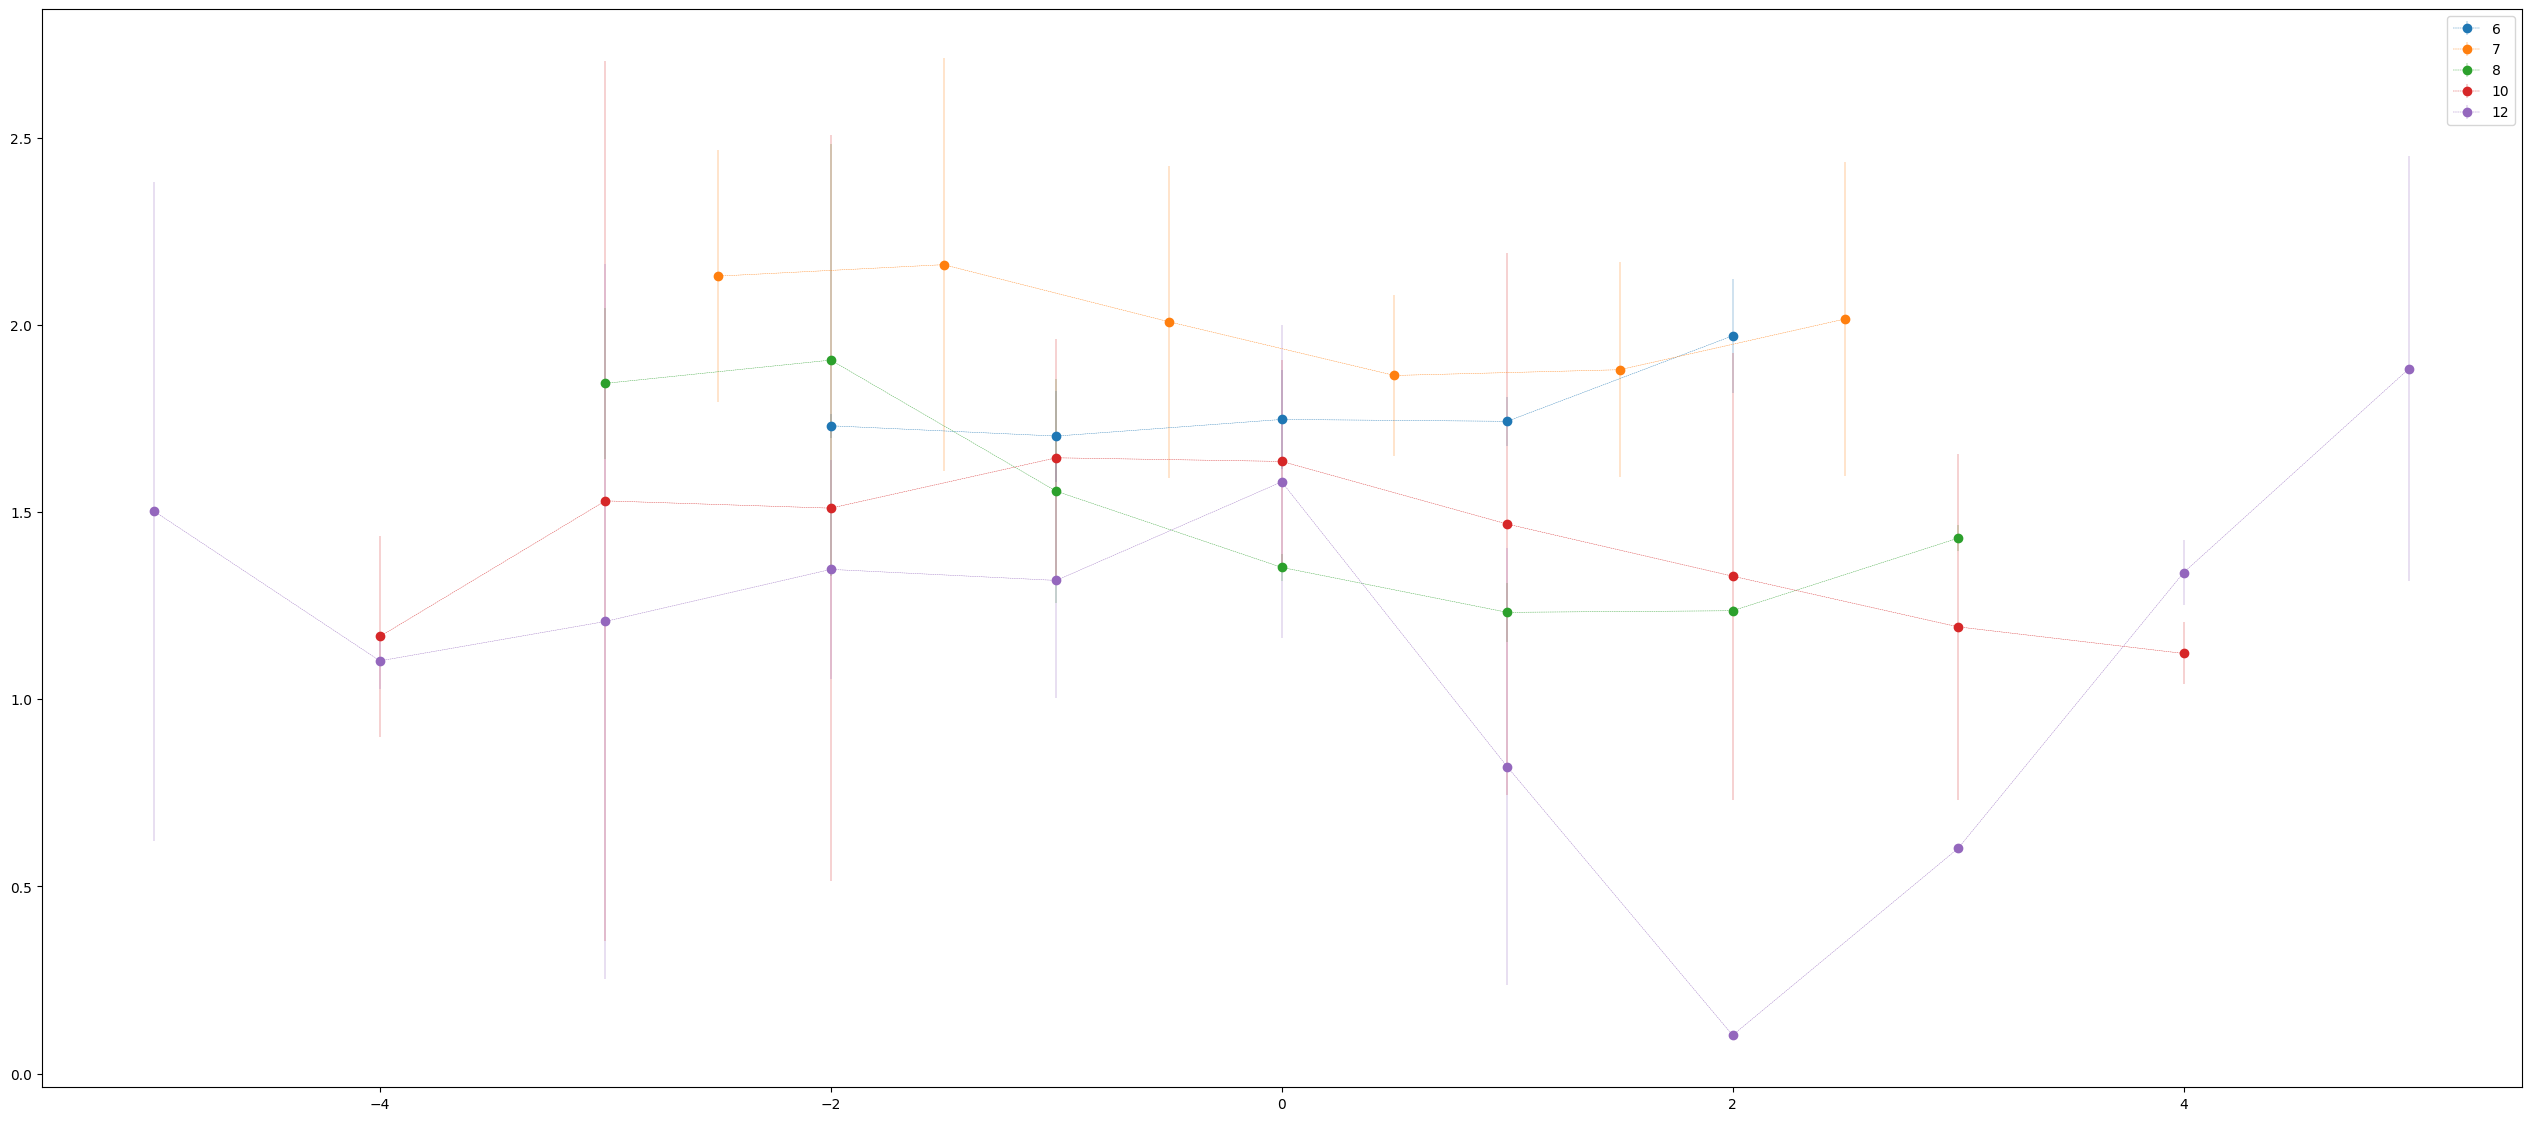

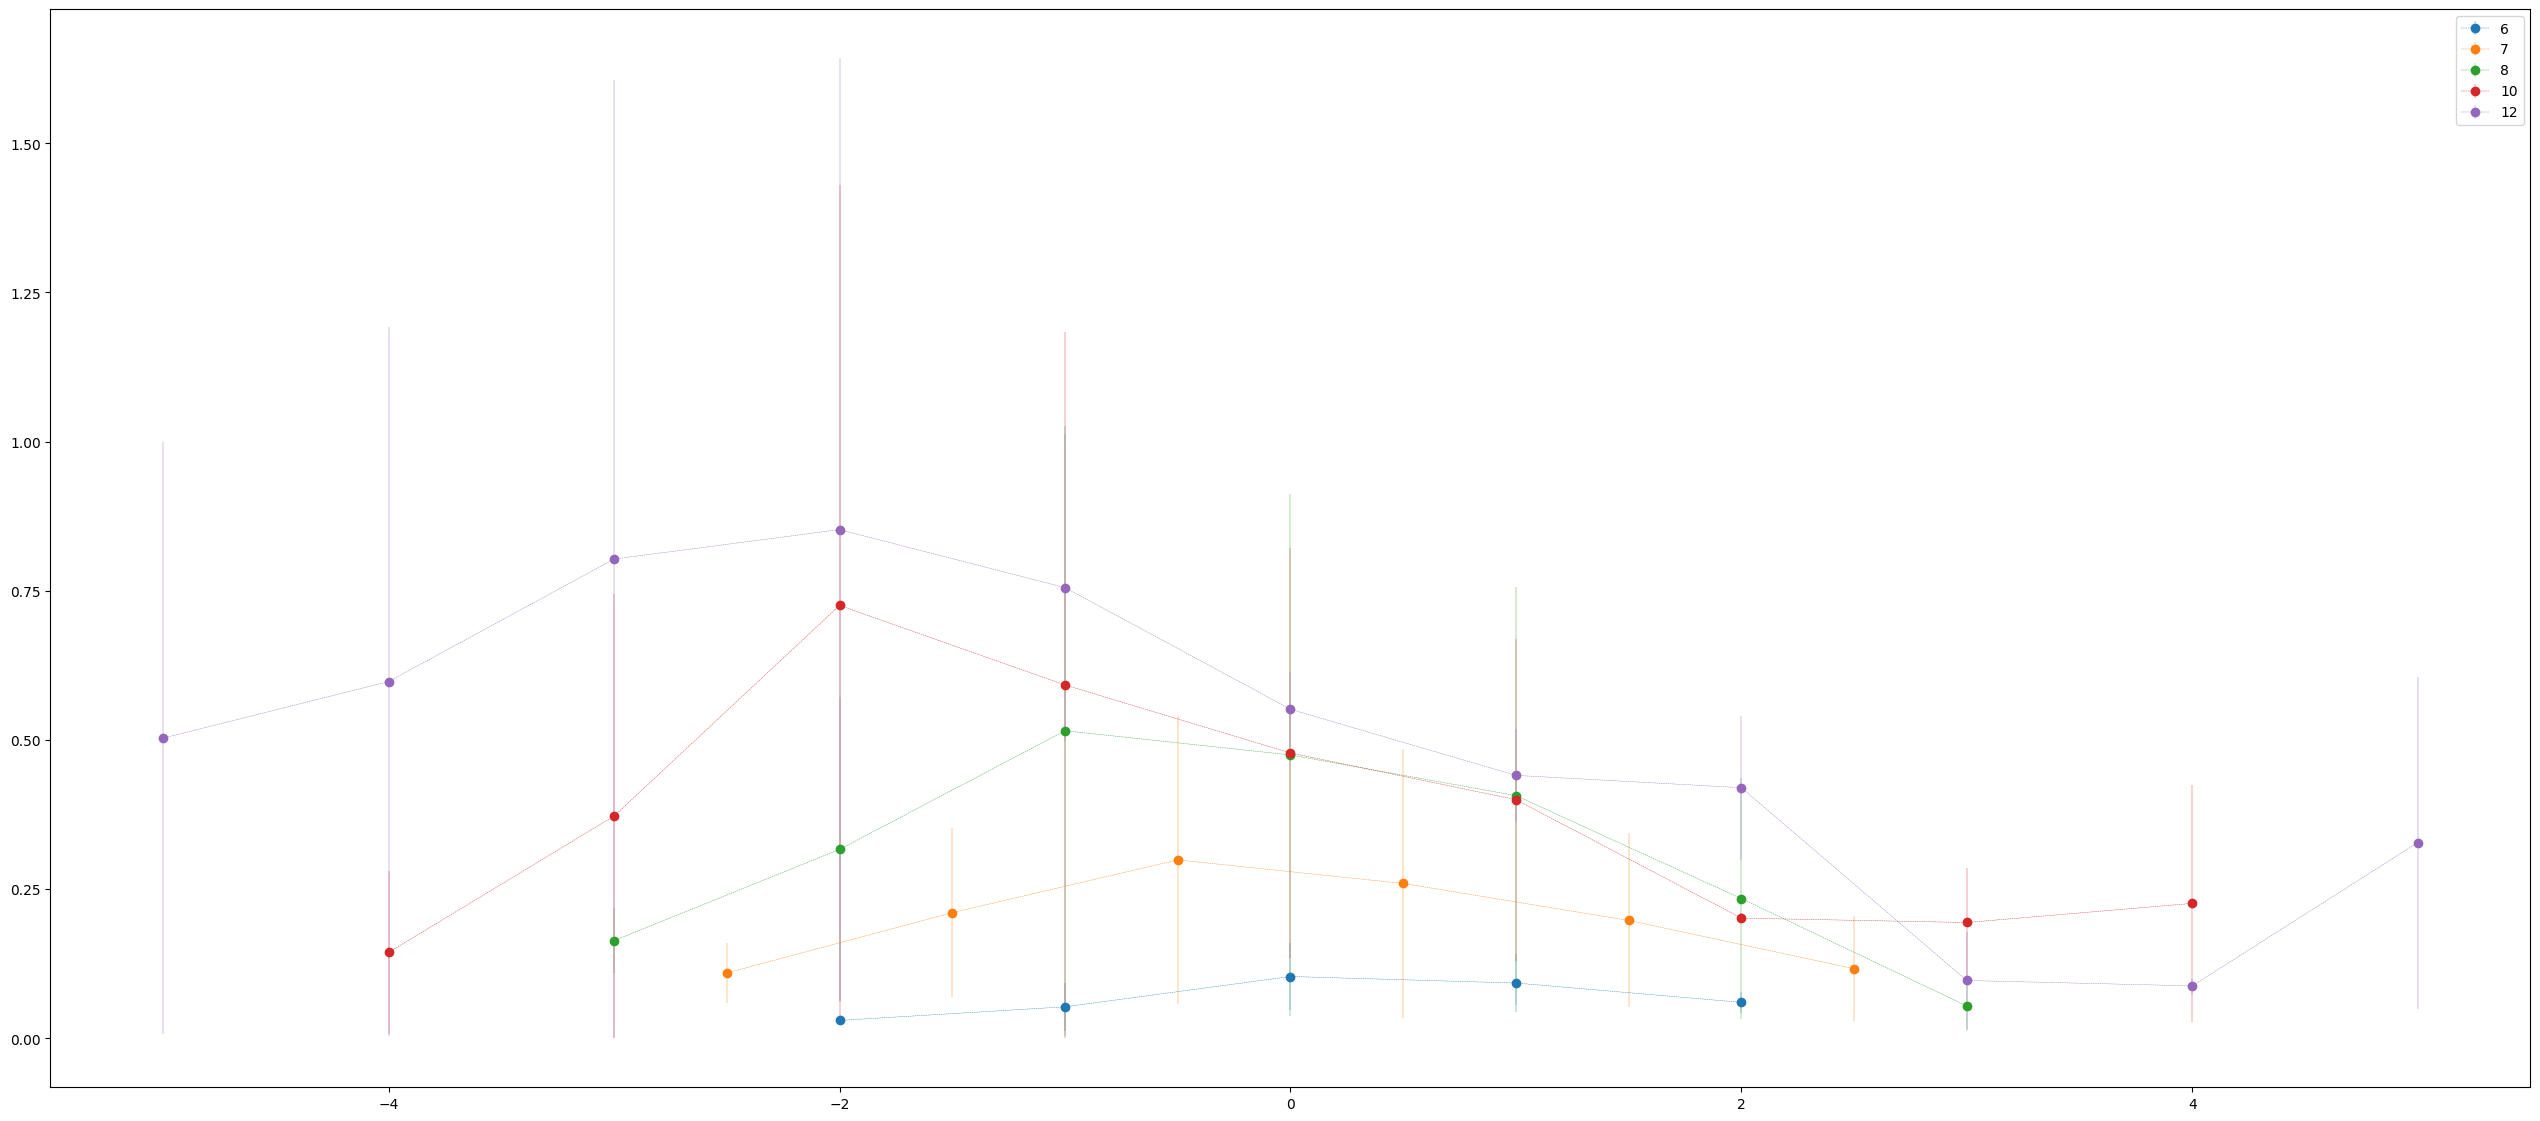

In [35]:
ok.plot_R()